# We are going to get what interesting about the saling data. This datas is about jan/2009

In [53]:
# Import packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

In [54]:
sales_data = pd.read_csv("SalesJan2009.csv")

sales_data.head()

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude
0,1/2/09 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,51.500000,-1.116667
1,1/2/09 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,39.195000,-94.681940
2,1/2/09 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,46.188060,-123.830000
3,1/3/09 14:44,Product1,1200,Visa,Gouya,Echuca,Victoria,Australia,9/25/05 21:13,1/3/09 14:22,-36.133333,144.750000
4,1/4/09 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/09 12:45,33.520560,-86.802500


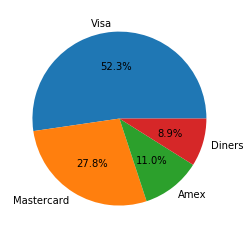

Visa          522
Mastercard    277
Amex          110
Diners         89
Name: Payment_Type, dtype: int64

In [55]:
# Visualisation of payment type and the proportion of each
sales_by_payment_type = sales_data ["Payment_Type"].value_counts()

plt.pie(sales_by_payment_type,labels=sales_by_payment_type.index,autopct='%1.1f%%')
plt.show()

sales_by_payment_type

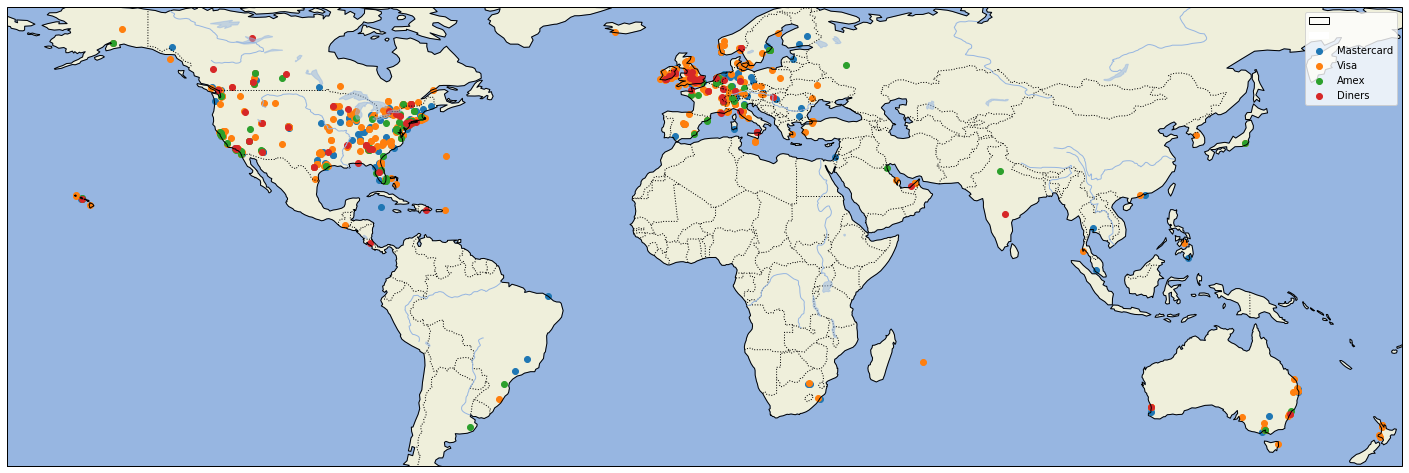

In [56]:
## Show the distribution of payment type in the world

fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

plt.scatter(sales_data.Longitude[sales_data.Payment_Type =="Mastercard"], sales_data.Latitude[sales_data.Payment_Type =="Mastercard"])
plt.scatter(sales_data.Longitude[sales_data.Payment_Type =="Visa"], sales_data.Latitude[sales_data.Payment_Type =="Visa"])
plt.scatter(sales_data.Longitude[sales_data.Payment_Type =="Amex"], sales_data.Latitude[sales_data.Payment_Type =="Amex"])
plt.scatter(sales_data.Longitude[sales_data.Payment_Type =="Diners"], sales_data.Latitude[sales_data.Payment_Type =="Diners"])
plt.legend(["","","Mastercard","Visa","Amex","Diners"])
plt.savefig("scat_map.png")
plt.show()


In [57]:
def group_values_by(data, col, row, category=None):
    L = []
    if category != None:
        data_ext = data[data[col] == category]
    else :
        data_ext = data[:]
        
    df = pd.pivot_table(data_ext,values=[col],index=row,aggfunc=pd.value_counts)
    
    for line in df[col] :
        L.append(np.sum(line))

    L = pd.DataFrame(L, index=df.index, columns=df.columns,dtype=int)

    return L

In [58]:
payment_type_by_country_sum = group_values_by(sales_data,col="Payment_Type",row="Country")

payment_type_by_country_sum


,Payment_Type
Country,
Argentina,1
Australia,38
Austria,7
Bahrain,1
Belgium,8
Bermuda,1
Brazil,5
Bulgaria,1
Canada,76


In [59]:
## Count of Mastercard by country
mastercard = group_values_by(sales_data,col="Payment_Type",row="Country",category="Mastercard")
mastercard.rename(columns={'Payment_Type': 'Mastercard'}, inplace=True)
mastercard

,Mastercard
Country,
Australia,12
Austria,4
Belgium,1
Brazil,3
Bulgaria,1
Canada,18
Cayman Isls,1
Denmark,5
Finland,2


In [60]:
## Count of Visa by country
visa = group_values_by(sales_data,col="Payment_Type",row="Country",category="Visa")
visa.rename(columns={'Payment_Type': 'Visa'}, inplace=True)
visa

,Visa
Country,
Australia,22
Austria,3
Bahrain,1
Belgium,5
Bermuda,1
Brazil,1
Canada,43
China,1
Czech Republic,3


In [61]:
## Count of Amex by country
amex = group_values_by(sales_data,col="Payment_Type",row="Country",category="Amex")
amex.rename(columns={'Payment_Type': 'Amex'}, inplace=True)
amex

,Amex
Country,
Argentina,1
Australia,2
Belgium,2
Brazil,1
Canada,5
France,3
Germany,2
India,1
Italy,1


In [62]:
## Count of Diners by country
diners = group_values_by(sales_data,col="Payment_Type",row="Country",category="Diners")
diners.rename(columns={'Payment_Type': 'Diners'}, inplace=True)
diners

,Diners
Country,
Australia,2
Canada,10
Costa Rica,1
Dominican Republic,1
France,4
Germany,3
Hungary,1
India,1
Ireland,8


In [66]:
print("Mastercard is used in %d countries"%len(mastercard))
print("Visa is used in %d countries"%len(visa))
print("Amex is used in %d countries"%len(amex))
print("Diners is used in %d countries"%len(diners))


Mastercard is used in 29 countries
Visa is used in 41 countries
Amex is used in 18 countries
Diners is used in 17 countries


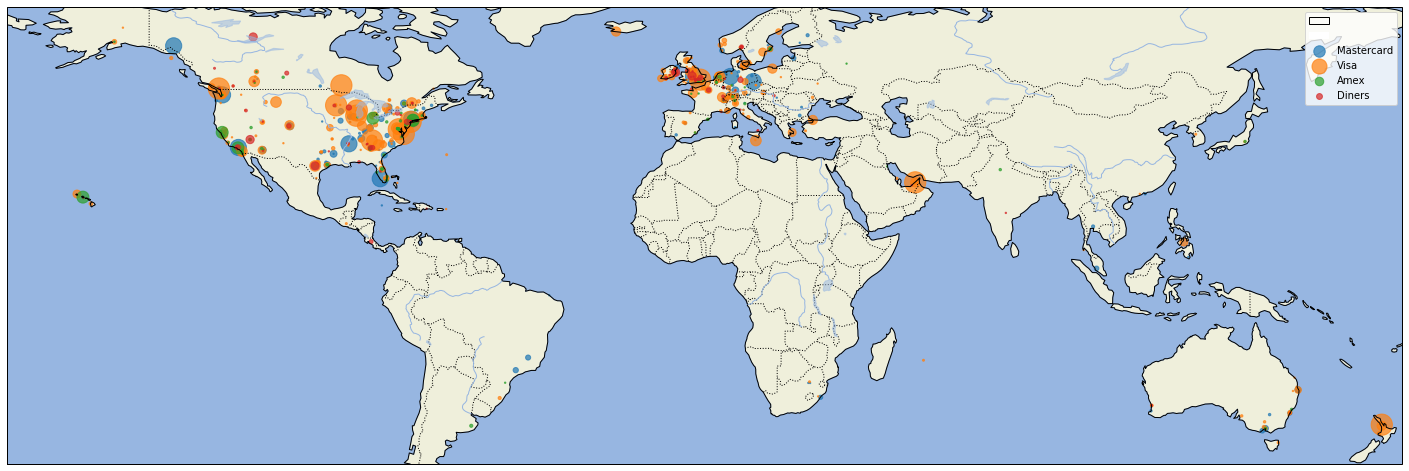

In [52]:
## Show the distribution of payment type in the world by country proportionally to the useful of each

fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

plt.scatter(sales_data.Longitude[sales_data.Payment_Type =="Mastercard"], sales_data.Latitude[sales_data.Payment_Type =="Mastercard"],s=mastercard*2,alpha=0.7)
plt.scatter(sales_data.Longitude[sales_data.Payment_Type =="Visa"], sales_data.Latitude[sales_data.Payment_Type =="Visa"],s=visa*2,alpha=0.7)
plt.scatter(sales_data.Longitude[sales_data.Payment_Type =="Amex"], sales_data.Latitude[sales_data.Payment_Type =="Amex"],s=amex*2,alpha=0.7)
plt.scatter(sales_data.Longitude[sales_data.Payment_Type =="Diners"], sales_data.Latitude[sales_data.Payment_Type =="Diners"],s=diners*2,alpha=0.7)
plt.legend(["","","Mastercard","Visa","Amex","Diners"])
plt.savefig("scat_map.png")
plt.show()
